In [1]:
%config Completer.use_jedi = False

# Load data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

# Create target data

In [4]:
import numpy as np

In [5]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# Split data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# Feature engineering

In [8]:
from sklearn.preprocessing import PolynomialFeatures

### Degree 2

In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape, test_input.shape

((42, 9), (14, 3))

In [10]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

# Build a linear regression model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [13]:
lr.score(train_poly, train_target)

0.9903183436982124

In [14]:
lr.score(test_poly, test_target)

0.9714559911594134

# Feature engineering

### degree 5

In [15]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape, test_poly.shape

((42, 55), (14, 55))

In [16]:
lr.fit(train_poly, train_target)

LinearRegression()

In [17]:
lr.score(train_poly, train_target)

0.9999999999991097

In [18]:
lr.score(test_poly, test_target)

-144.40579242684848

# Standardizes data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# Build a ridge model

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [23]:
ridge.score(train_scaled, train_target)

0.9896101671037343

In [24]:
ridge.score(test_scaled, test_target)

0.9790693977615397

# Find the best hyper-parameter 'alpha'

In [25]:
import matplotlib.pyplot as plt

In [26]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

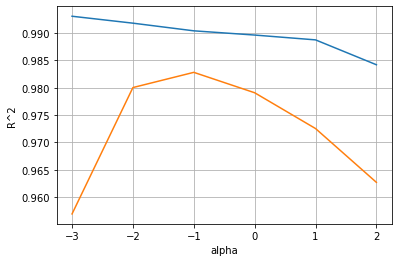

In [27]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.grid()
plt.show()

In [28]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [29]:
ridge.score(train_scaled, train_target)

0.9903815817570366

In [30]:
ridge.score(test_scaled, test_target)

0.9827976465386926

# Build a lasso model

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [33]:
lasso.score(train_scaled, train_target)

0.989789897208096

In [34]:
lasso.score(test_scaled, test_target)

0.9800593698421883

# Find the best hyper-parameter 'alpha'

In [35]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/jaehwanglee/tensorflow2_p38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/jaehwanglee/tensorflow2_p38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


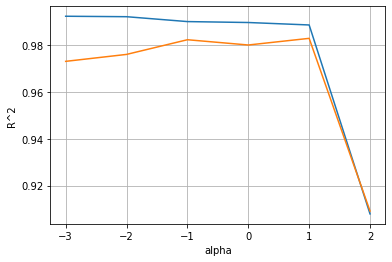

In [36]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.grid()
plt.show()

In [37]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [38]:
lasso.score(train_scaled, train_target)

0.9888067471131867

In [39]:
lasso.score(test_scaled, test_target)

0.9824470598706695

# Find zero coefficients

In [40]:
np.sum(lasso.coef_ == 0)

40